In [1]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

loading MHR


In [2]:
reviews_features = pd.read_csv('data/book_sample.csv.gz')
df_agg = reviews_features[['overall','asin']].groupby(['asin']).agg(['count','mean'])
df_agg['overall'].sort_values('count',ascending=False).head(10)

,count,mean
asin,,
0345504968,147,2.510204
0060817089,147,3.353741
0060537639,146,3.342466
014118776X,144,3.937500
0061472786,137,4.284672
0312853238,134,2.350746
0143038915,133,4.263158
0375432183,132,2.939394
000779021X,131,3.190840


In [6]:
#list_asin = ['0007444117','B00A3YN0Z0','B0074BW614','B00CMQTVK0','B0094NY3R0','B0045FM6SU','B00DVFLJDS']
#reviews_features = reviews_features[reviews_features.asin.isin(list_asin)]
reviews_features = reviews_features[reviews_features.pageRank>0]
print reviews_features.shape
reviews_features.drop('powerWithStar', axis=1, inplace=True)
reviews_features,ndcg_mhr = mhr.executeFromDf(reviews_features)
#reviews_features.to_csv('data/book_sample.csv.gz', compression='gzip')

(24234, 18)
product=0002051850 ndcg=0.77586059397 (0.77586059397)
product=000224053X ndcg=0.78708736259 (0.798314131209)
product=0006393195 ndcg=0.814988376713 (0.87079040496)
product=0006530702 ndcg=0.832007369892 (0.883064349431)
product=0007157150 ndcg=0.851372792167 (0.928834481266)
product=0007167040 ndcg=0.855114198406 (0.873821229598)
product=000721278X ndcg=0.863690617635 (0.915149133012)
product=0007228023 ndcg=0.869237917831 (0.908069019201)
product=0007231601 ndcg=0.866405022803 (0.843741862581)
product=000779021X ndcg=0.858973718463 (0.792091979408)
product=0026045702 ndcg=0.866106047352 (0.937429336236)
product=0029109752 ndcg=0.868252917995 (0.891868495072)
product=006000942X ndcg=0.863793991217 (0.810286869884)
product=0060083816 ndcg=0.861655729414 (0.833858325971)
product=0060084332 ndcg=0.864178805014 (0.899501863414)
product=0060175869 ndcg=0.865763017306 (0.889526201685)
product=0060192119 ndcg=0.867353795855 (0.892806252635)
product=006019491X ndcg=0.860004831835 (

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


PageRank ndcg=0.727454606046
PageRank Corr=0.269278698778
HITs ndcg=0.73002215036
HITs Corr=0.273162721447
MHR ndcg=0.741230569123
MHR Corr=0.0552548806599
PR_HS_LEN ndcg=0.726896292723
PR_HS_LEN Corr=0.27280968014
461
461
461
461


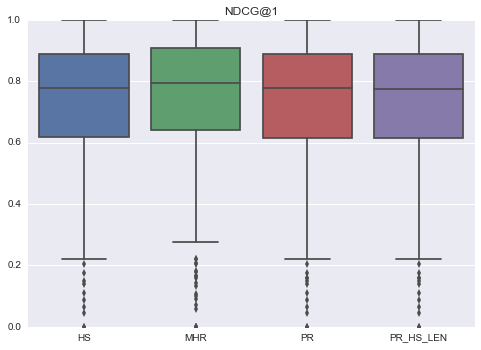

In [3]:
import seaborn as sns
k=1

ndcg_pr=ndcg.calc_ndcg(reviews_features,'pageRank',k) 
corr_pr=ndcg.calc_corr(reviews_features,'pageRank') 
print "PageRank ndcg="+str(np.mean(ndcg_pr))
print "PageRank Corr="+str(np.mean(corr_pr))

ndcg_hs=ndcg.calc_ndcg(reviews_features,'hits',k) 
corr_hs=ndcg.calc_corr(reviews_features,'hits') 
print "HITs ndcg="+str(np.mean(ndcg_hs))
print "HITs Corr="+str(np.mean(corr_hs))

ndcg_mhr=ndcg.calc_ndcg(reviews_features,'powerWithStar',k) 
corr_mhr=ndcg.calc_corr(reviews_features,'powerWithStar') 
print "MHR ndcg="+str(np.mean(ndcg_mhr))
print "MHR Corr="+str(np.mean(corr_mhr))

ndcg_prhslen=ndcg.calc_ndcg(reviews_features,'pr_hs_len',k) 
corr_prhslen=ndcg.calc_corr(reviews_features,'pr_hs_len') 
print "PR_HS_LEN ndcg="+str(np.mean(ndcg_prhslen))
print "PR_HS_LEN Corr="+str(np.mean(corr_prhslen))

print (len(ndcg_hs))
print (len(ndcg_pr))
print (len(ndcg_mhr))
print (len(ndcg_prhslen))

tip={}
tip['HS']=ndcg_hs
tip['PR']=ndcg_pr
tip['PR_HS_LEN']=ndcg_prhslen
tip['MHR']=ndcg_mhr
df = pd.DataFrame(tip)
ax = sns.boxplot(data=df)
#ax = sns.swarmplot(data=df, color=".25")
ax.set_title('NDCG@'+str(k))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

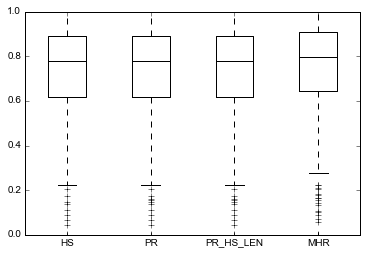

In [4]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt 
%matplotlib inline

data_to_plot = [ ndcg_hs,ndcg_pr,ndcg_prhslen,ndcg_mhr ]

# Create the boxplot



#print bp
        
        
        
bp = plt.boxplot(data_to_plot, labels=["HS","PR","PR_HS_LEN","MHR"])
plt.setp(bp['boxes'], linewidth=1, color='black')
plt.setp(bp['fliers'], linewidth=1, color='black')
plt.setp(bp['medians'], linewidth=1, color='black')
plt.setp(bp['whiskers'], linewidth=1, color='black')

#plt.setp(bp['caps'], visible=False)
#plt.setp(bp['fliers'], visible=False)

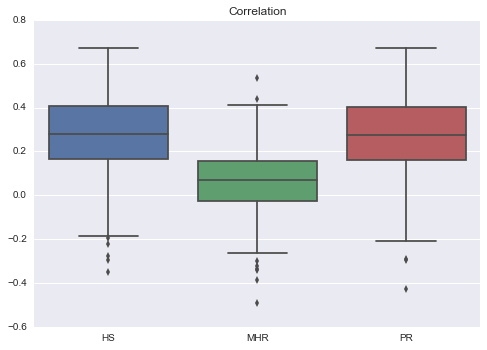

In [5]:
tip={}
tip['PR']=corr_pr
tip['HS']=corr_hs
tip['MHR']=corr_mhr
dftip=pd.DataFrame(tip)
dftip.head()
ax = sns.boxplot(data=dftip)
#ax = sns.swarmplot(data=dftip, color=".25")

ax.set_title('Correlation')